In [1]:
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [2]:
yelp_path = r'../works/data/reviews_yelp_nn.csv'
# col = ['business_id', 'cool', 'date', 'funny', 'review_id', 'stars', 'text', 'useful', 'user_id']
print('----Iniciando carga del dataset----')


df = pd.read_csv(yelp_path,
                 sep='\t',
                 header=0)

----Iniciando carga del dataset----


/Users/nestornav/.virtualenvs/diplo/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.shape

(3342958, 9)

In [4]:
!cat ../works/data/reviews_yelp_nn.csv | head -n 3

business_id	cool	date	funny	review_id	stars	text	useful	user_id
EhGPj8iJDIdaHnWg9d5BgA	0	2016-04-20 14:30:53	0.0	uJRdHLz4XNmDK5pOkWbZNA	5.0	Best Dim Sum in the city, their cart service is great and offer big selection of quality dim sum.  You can order off the menu too if there is something you haven't seen come around.  It is a little more expensive but you can't beat it, and the view is perfect for a weekend brunch.	0.0	POETn3fQcZ8ngLAARCATSg
VPcFNI-6HICR5SJM--KjNA	5	2013-05-14 03:08:12	2.0	TlPh8jy8bt_TSGfjEw-pvA	5.0	"How... HOW did I not head down here sooner? For real. When Yelpers say there's a Calgary establishment and I need to drive halfway across town to get to it, I need to get my ass in my car and go. 
cat: stdout: Broken pipe


In [24]:
df.shape

(6820636, 1)

In [25]:
df.head()

,,business_id\tcool\tdate\tfunny\treview_id\tstars\ttext\tuseful\tuser_id
EhGPj8iJDIdaHnWg9d5BgA\t0\t2016-04-20 14:30:53\t0.0\tuJRdHLz4XNmDK5pOkWbZNA\t5.0\tBest Dim Sum in the city,their cart service is great and offer big selection of quality dim sum. You can order off the menu too if there is something you haven't seen come around. It is a little more expensive but you can't beat it,and the view is perfect for a weekend brunch....
"VPcFNI-6HICR5SJM--KjNA\t5\t2013-05-14 03:08:12\t2.0\tTlPh8jy8bt_TSGfjEw-pvA\t5.0\t""How... HOW did I not head down here sooner? For real. When Yelpers say there's a Calgary establishment and I need to drive halfway across town to get to it",I need to get my ass in my car and go.,NaN
Bill's. Where has your ginger beef been all my life? What's that? Right in your kitchen,served on your tables,mouths and mouths before me having devoured i...
It's not just the ginger beef here that gets my 5 stars though. It's that it's just a consistently solid experience. Just like everyone said,Bill himself was there to greet us at the door when we walked up the stairs. We snagged the last table for 2,the rest of the restaurant was full. And we o...
The meal consisted of:,NaN,NaN


In [35]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ


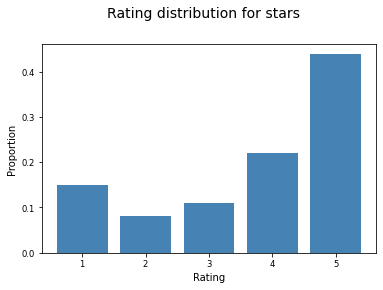

In [44]:
# Check rating distribution
fig = plt.figure(figsize = (6, 4))

title = fig.suptitle("Rating distribution for stars", fontsize=14)

fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Rating")
ax.set_ylabel("Proportion") 
w_q = df['stars'].value_counts(normalize=True)
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')

## Aproximación mas naive para obtener un target

In [9]:
def get_target(star):
    return 'positive' if star > 3 else 'negative'

In [10]:
df['target'] = df['stars'].apply( lambda x: get_target(x) )

In [11]:
df.tail()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,target
3342953,oryS4vX0xkKC4tOekgowDQ,0,2016-07-17 21:32:48,0.0,pBNcMg-KVzZG-xDu9cgLww,2.0,Slow service to seat and then to serve. Left w...,0.0,srjcYNoIOXJ57VP8z7gwmQ,negative
3342954,na4Th5DrNauOv-c43QQFvA,4,2017-11-28 22:43:05,2.0,xNG2SzEHJi7w7LbJDF7Oog,4.0,I stayed at the Bellagio for 3 nights this mon...,12.0,uCNgCZCuo07ew0sWPB1z7g,positive
3342955,Lg238Ittk3KO3lqHyBAcYA,1,2016-10-07 06:05:29,1.0,RCNXjfRdRZ2exHihiy-oqw,5.0,1: book an appointment! You get to walk past ...,1.0,v1w2A6kHRiI1OD4DyXOiDQ,positive
3342956,NxeEdKkvbZmuuBar_1NFrg,1,2014-10-19 18:02:56,2.0,g0mcjOV3o3-dPzpKiRecDg,1.0,"This review is based on quality of pricing, no...",13.0,j-i6_zboeko9mkR9UIFKMw,negative
3342957,yvtxKjAySVvpPKt0VLWscQ,0,2018-07-02 20:38:51,0.0,rH76Hu3UG1HcfeDS3zJS-A,2.0,I posted and review earlier that was removed. ...,0.0,yWFFDVEoY_g3aCtMWf7odQ,negative


-------
# Exploración de datos mas liviana

In [38]:
print('Proporcion por cada cada tipo de estrella:')
df.groupby(['stars'])['stars'].count()/df['stars'].count().sum()

Proporcion por cada cada tipo de estrella:


stars
1.0    0.149914
2.0    0.081144
3.0    0.110502
4.0    0.219540
5.0    0.438900
Name: stars, dtype: float64

In [13]:
weights = [
    {'id':1, 'weight': 0.149914},
    {'id':2, 'weight': 0.081144},
    {'id':3, 'weight': 0.110502},
    {'id':4, 'weight': 0.219540},
    {'id':5, 'weight': 0.438900}
]

def getWeight(rate):
    for x in weights:
        if rate == x['id']:
            return x['weight']
        

df['weights'] = df['stars'].apply( lambda x: getWeight(x) )

In [14]:
df.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,target,weights
0,EhGPj8iJDIdaHnWg9d5BgA,0,2016-04-20 14:30:53,0.0,uJRdHLz4XNmDK5pOkWbZNA,5.0,"Best Dim Sum in the city, their cart service i...",0.0,POETn3fQcZ8ngLAARCATSg,positive,0.438900
1,VPcFNI-6HICR5SJM--KjNA,5,2013-05-14 03:08:12,2.0,TlPh8jy8bt_TSGfjEw-pvA,5.0,How... HOW did I not head down here sooner? Fo...,7.0,oUK6Xs5dPPnP4whFeZExGg,positive,0.438900
2,ugdUuApH3pYXggW5qpbALg,0,2016-08-26 16:51:37,0.0,GmoBAVE1pTo0kjmeKrXmLQ,4.0,Carnitas were wonderful. First time there and ...,0.0,SiaSUNlKQK7f57WBPmyyNw,positive,0.219540
3,3fCxmmg8nHGaE5upJWQUrw,0,2016-03-24 17:23:19,0.0,ZHuM9P81zfuNuFZ5ThXNRg,5.0,Great staff who are always willing to help. I ...,0.0,PsH5Qi8R69WAlhNv8mXWRA,positive,0.438900
4,LAqbIi2TDn8BDvPB0nLVhQ,1,2012-10-25 15:02:48,0.0,-2Ce00mfWYP20yt7k6kARg,3.0,"This place is bigger, brighter, new so it's cl...",3.0,r-zUIQPaHzvIyL93wQaoiQ,negative,0.110502


-----
## Trabajemos con un sample basado en los pesos de la dis tribución

In [15]:
sample = df.sample(n=1000, weights='weights', random_state=1)
sample.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id,target,weights
1393861,oHeiAs-mnDJU1_4BD8_5Dg,0,2014-03-23 00:18:23,1.0,7h2PQpdxX3mu1Tj2yrapEQ,4.0,Excited that there's a new place to eat around...,11.0,h7a4TrmV9rBrBIcJgD54CQ,positive,0.21954
2407437,RC676YqyW2DCf9HhF1dPOQ,0,2015-03-26 17:26:05,0.0,Ntt4zSXcNM1p9HoI2usVag,5.0,I found this studio when I received a spa find...,1.0,dIHe5qoehkggNLcExPw_VQ,positive,0.43890
396,5QNXZcclknB2PkfeN7FJWQ,2,2011-04-04 00:57:05,2.0,Tc_BpEyOIN1OMJMoyXqugw,4.0,Rating this place is almost unfair. First off....,3.0,2DECrukmumziXTBI20idTA,positive,0.21954
1011074,K-SsrPH0nFExdpLrTo1X1w,0,2015-12-09 00:25:39,0.0,BX-1VF4f5PvwYbbwFysE2A,4.0,"Burgatory is a great place to ""get your carniv...",0.0,cz8H43bKsrhv_KHRgk07QQ,positive,0.21954
490528,Ac-DbrST8bF9Cpge5D9_Cg,0,2015-09-06 05:18:36,0.0,4FpiAh_Y3gvFU_uygV1U7Q,4.0,The best Pho and dumplings I've had in Pittsbu...,0.0,icmG-ZBRNSScSUJ-Nj1lhQ,positive,0.21954


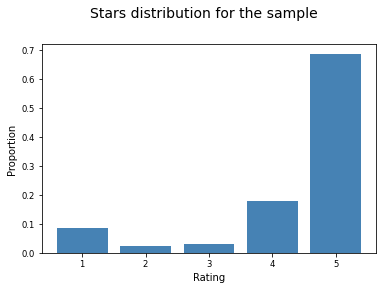

In [16]:
# validemos la distribución del sample

ratings = sample['stars'] # data from the sample

fig = plt.figure(figsize = (6, 4))

title = fig.suptitle("Stars distribution for the sample", fontsize=14)

fig.subplots_adjust(top=0.85, wspace=0.3)

ax = fig.add_subplot(1,1, 1)
ax.set_xlabel("Rating")
ax.set_ylabel("Proportion") 
w_q = ratings.value_counts(normalize=True)
w_q = (list(w_q.index), list(w_q.values))
ax.tick_params(axis='both', which='major', labelsize=8.5)
bar = ax.bar(w_q[0], w_q[1], color='steelblue')